In [91]:
# import lib/packages
import numpy as np
import pandas as pd


In [92]:
# import dataset
dataset = pd.read_csv("SMSSpamCollection",sep='\t',names=['labels','message'])

In [93]:
dataset

,labels,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [94]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   labels   5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [95]:
dataset.describe()

,labels,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [96]:
dataset['labels'] = dataset['labels'].map({'ham':0,'spam':1})

In [97]:
dataset

,labels,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

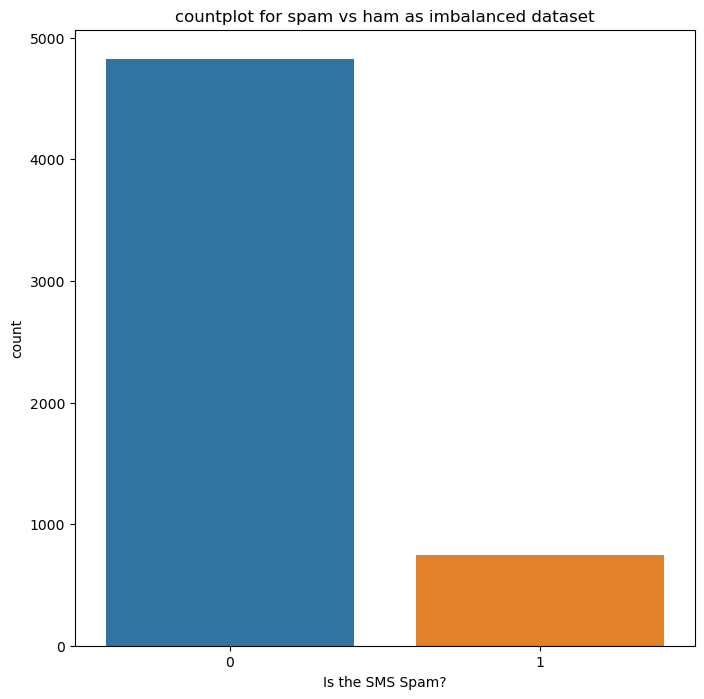

In [99]:
# countplot for spam vs ham as imbalanced dataset
plt.figure(figsize=(8,8))
g = sns.countplot(x="labels", data=dataset)
p = plt.title('countplot for spam vs ham as imbalanced dataset')
p = plt.xlabel('Is the SMS Spam?')
p = plt.ylabel('count')

In [100]:
#handling imbalanced dataset using oversampling
only_spam = dataset[dataset["labels"] == 1]

In [101]:
only_spam

,labels,message
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
5,1,FreeMsg Hey there darling it's been 3 week's n...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...
11,1,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


In [102]:
print('No of Spam SMS:',len(only_spam))
print('No of ham SMS:',len(dataset) - len(only_spam))

No of Spam SMS: 747
No of ham SMS: 4825


In [103]:
count = int((dataset.shape[0] - only_spam.shape[0]) / only_spam.shape[0])

In [104]:
count

6

In [105]:
for i in range(0,count-1):
    dataset = pd.concat([dataset,only_spam])
    
dataset.shape

(9307, 2)

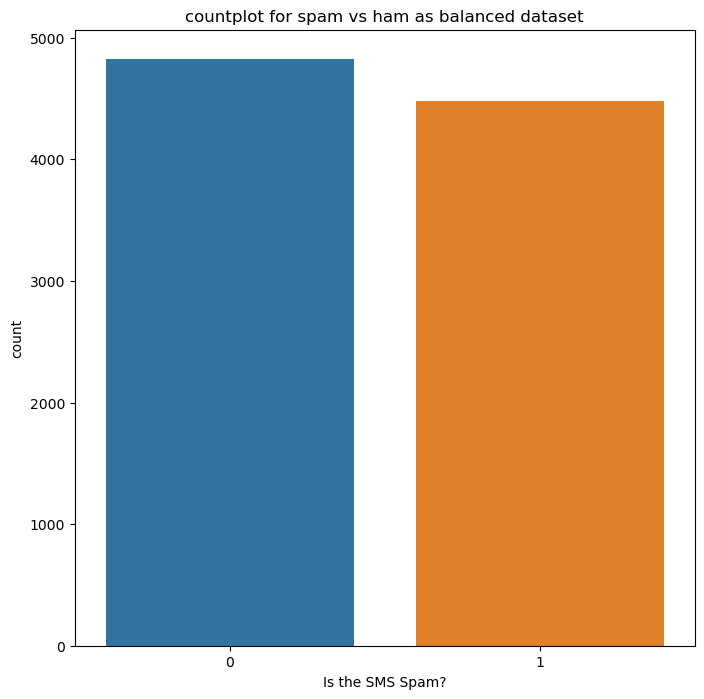

In [106]:
# countplot for spam vs ham as balanced dataset
plt.figure(figsize=(8,8))
g = sns.countplot(x="labels", data=dataset)
p = plt.title('countplot for spam vs ham as balanced dataset')
p = plt.xlabel('Is the SMS Spam?')
p = plt.ylabel('count')

In [107]:
#creating new feature word_count
dataset['word_count'] = dataset['message'].apply(lambda x: len(x.split()))

In [108]:
dataset

,labels,message,word_count
0,0,"Go until jurong point, crazy.. Available only ...",20
1,0,Ok lar... Joking wif u oni...,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,0,U dun say so early hor... U c already then say...,11
4,0,"Nah I don't think he goes to usf, he lives aro...",13
...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28


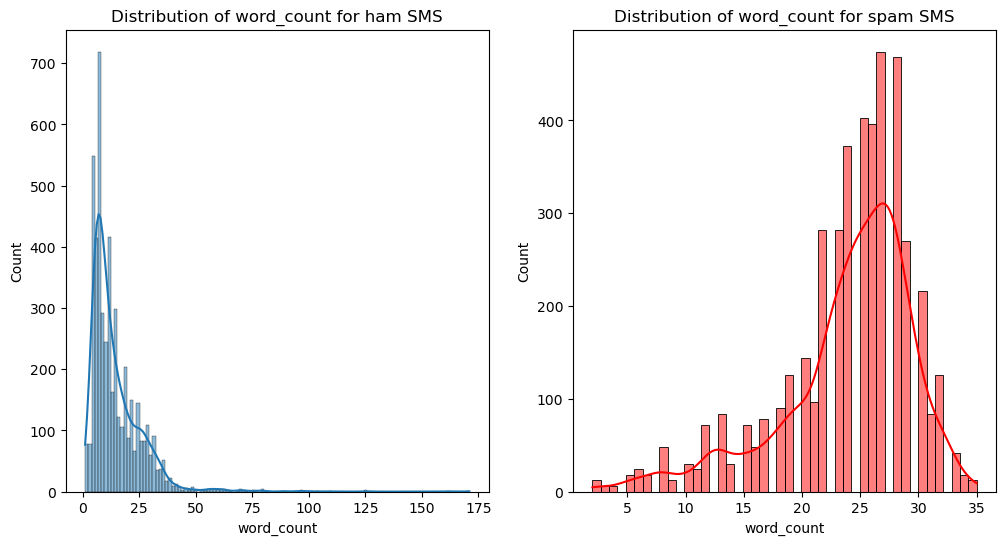

In [109]:
plt.figure(figsize=(12,6))

#(1,1)
plt.subplot(1,2,1)
g = sns.histplot(dataset[dataset["labels"] == 0].word_count, kde=True)
p = plt.title('Distribution of word_count for ham SMS')

#(1,2)
plt.subplot(1,2,2)
g = sns.histplot(dataset[dataset["labels"] == 1].word_count, color="red", kde=True)
p = plt.title('Distribution of word_count for spam SMS')

plt.tight_layout
plt.show()

In [110]:
# creating new features of containing currency symbols
def currency(data):
    currency_symbols = ['$','£','₹','€','¥']
    for i in currency_symbols:
       if i in data:
           return 1
    return 0

In [111]:
dataset["contains_currency_symbols"] = dataset["message"].apply(currency)

In [112]:
dataset

,labels,message,word_count,contains_currency_symbols
0,0,"Go until jurong point, crazy.. Available only ...",20,0
1,0,Ok lar... Joking wif u oni...,6,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0
3,0,U dun say so early hor... U c already then say...,11,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0
...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16,0
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,1
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28,0
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28,0


In [113]:
df = pd.DataFrame(dataset)


In [114]:
df['labels'] = df['labels'].astype(str)

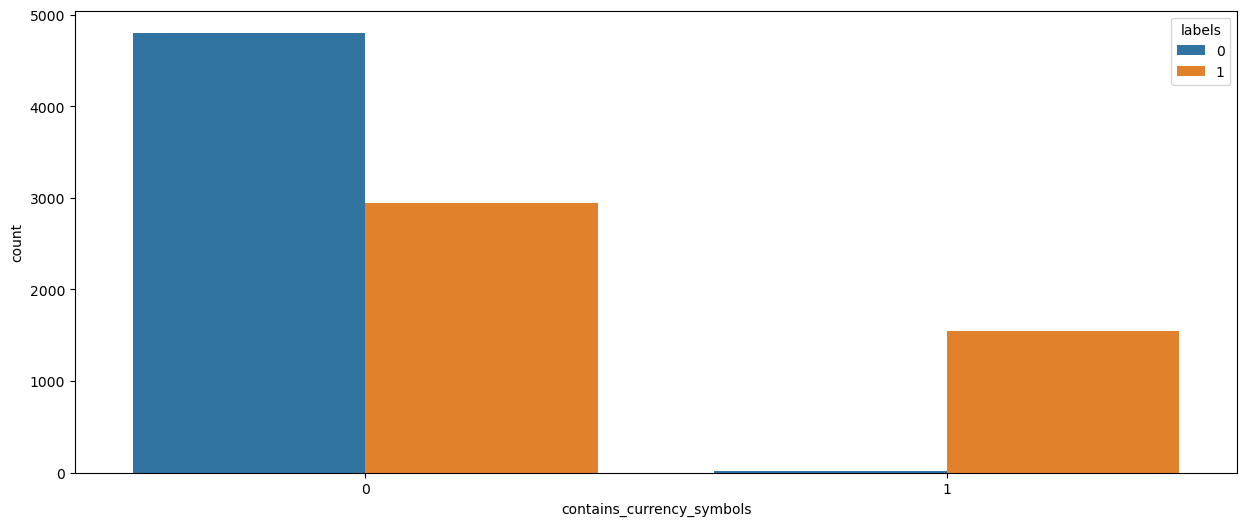

In [115]:
# countplot for contains_currency_symbols


plt.figure(figsize=(15,6))

sns.countplot(x="contains_currency_symbols", data=df, hue = "labels")
plt.show()

In [116]:
#creating new feature of containing numbers
def number(data):
    for i in data:
        if ord(i) >= 48 and ord(i) <= 57:
            return 1
    return 0

In [117]:
dataset["contains_number"] = dataset['message'].apply(number)

In [118]:
dataset

,labels,message,word_count,contains_currency_symbols,contains_number
0,0,"Go until jurong point, crazy.. Available only ...",20,0,0
1,0,Ok lar... Joking wif u oni...,6,0,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0,1
3,0,U dun say so early hor... U c already then say...,11,0,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0,0
...,...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16,0,1
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,1,1
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28,0,1
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28,0,1


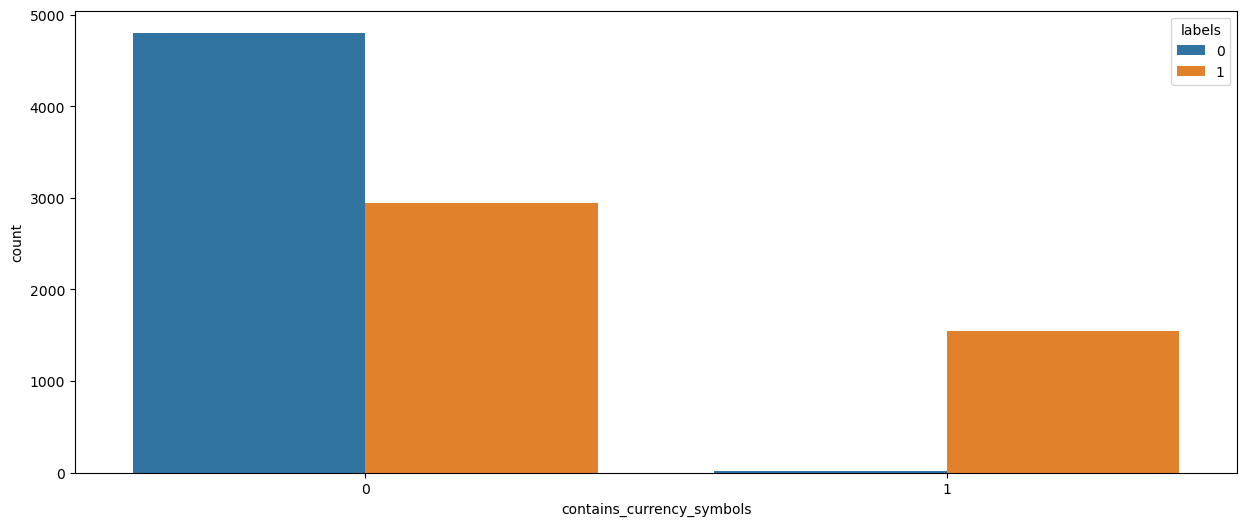

In [119]:
plt.figure(figsize=(15,6))

sns.countplot(x="contains_currency_symbols", hue = "labels", data=df)
plt.show()

In [120]:
import nltk
import re



In [121]:
stopwords = nltk.corpus.stopwords.words("english")
wnl = nltk.stem.WordNetLemmatizer()

In [122]:
corpus = []
for sms in list(dataset.message):
    message = re.sub(pattern='[^a-zA-z]', repl = ' ',string=sms)
    message = message.lower()
    words = message.split()
    filtered_words = [word for word in words if word not in stopwords]
    lemm_words = [wnl.lemmatize(word) for word in filtered_words]
    message = ' '.join(lemm_words)

    corpus.append(message) 

In [123]:
corpus

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though',
 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune',
 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour',
 'mobile month u r entitled update latest colour mobile camera free call mobile update co free',
 'gonna home soon want talk stuff anymore tonight k cried enough today',
 'six chance win cash pound txt csh send cost p day day tsandcs apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw'

In [124]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
tfidf = TfidfVectorizer(max_features=500)
vectors = tfidf.fit_transform(corpus).toarray()
feature_names = tfidf.get_feature_names_out()  

In [125]:
X = pd.DataFrame(vectors, columns= feature_names)
y = dataset['labels']  

In [126]:
X 

,ac,access,account,address,admirer,age,already,also,always,amp,...,xxx,ya,yeah,year,yes,yesterday,yet,yo,yr,yup
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.4117,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9302,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
9303,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.326017,0.0,0.0,0.0,0.0,0.0
9304,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.287064,0.0,0.0,0.0,0.0,0.0
9305,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [127]:
y

0       0
1       0
2       1
3       0
4       0
       ..
5537    1
5540    1
5547    1
5566    1
5567    1
Name: labels, Length: 9307, dtype: int64

In [128]:
from sklearn.model_selection import train_test_split


In [129]:
X_train, X_test, y_train, ytest = train_test_split(X, y, test_size=0.2)


In [130]:
X_test

,ac,access,account,address,admirer,age,already,also,always,amp,...,xxx,ya,yeah,year,yes,yesterday,yet,yo,yr,yup
992,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6899,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4885,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3679,0.0,0.0,0.0,0.0,0.0,0.246349,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1249,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2554,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5831,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7649,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2286,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [131]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()


In [132]:
from sklearn.metrics import accuracy_score, confusion_matrix


In [133]:
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)


In [134]:
accuracy_score(ytest, y_pred)


0.9452201933404941

In [135]:
cm = confusion_matrix(ytest, y_pred)


<Axes: >

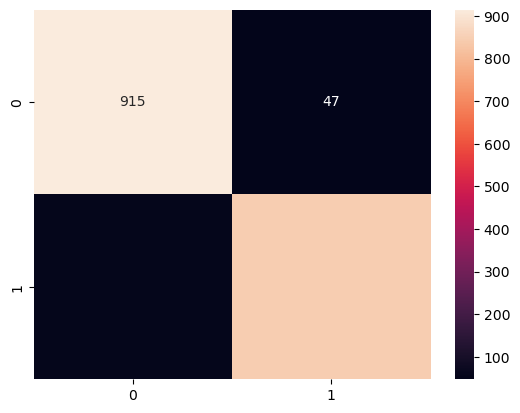

In [136]:
sns.heatmap(cm, annot = True, fmt='g')


In [137]:
def predict_spam(sms):
       message = re.sub(pattern='[^a-zA-z]', repl=' ', string=sms)  #filerting out special characters and numbers
       message = message.lower()
       words = message.split() #Tokenizer
       filtered_words = [word for word in words if word not in stopwords]
       lemm_words = [wnl.lemmatize(word) for word in filtered_words]
       message = ' '.join(lemm_words)
       temp = tfidf.transform([message]).toarray()
       return mnb.predict(temp)


In [138]:
# prediction 1 - lottery text message
sample_message = '''IMPORTANT - You could be entitled up to £3,160 in compensation from mis-sold PPI on a credit card or loan.'''

if predict_spam(sample_message):
  print('Gotcha! This is a SPAM message.')
else:
  print('This is a HAM (normal) message.')


Gotcha! This is a SPAM message.


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


In [139]:
# prediction 3 - Transaction confirmation text message
sample_message = 'Sam, your rent payment for Jan 19 has been received.1,300 will be drafted from your wells Fargo Account'

if predict_spam(sample_message):
  print('Gotcha! This is a SPAM message.')
else:
  print('This is a HAM (normal) message.')


This is a HAM (normal) message.


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(
